In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 11.1.1 Standard distributions

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


<Figure size 432x288 with 0 Axes>

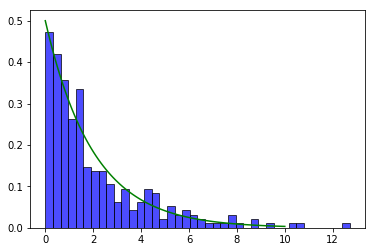

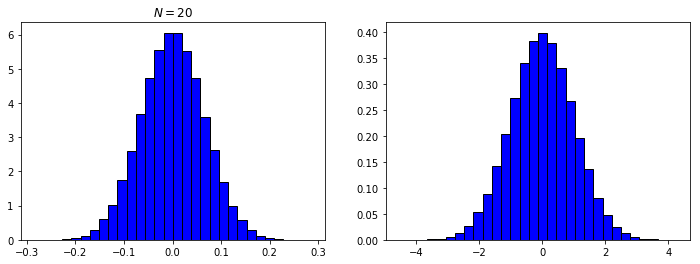

<Figure size 432x288 with 0 Axes>

In [2]:
# Exponential distribution
N = 100
lambda_ = 0.5
y = np.linspace(0, 10, N)
py = lambda_*np.exp(-lambda_*y)
plt.figure()
plt.plot(y,py,c='green')

z = np.random.uniform(0,1,3*N)
yz = -1/lambda_*np.log(1-z)
pyz = lambda_*np.exp(-lambda_*yz)
# plt.scatter(yz,pyz,marker='o', s=50, c='',edgecolors='blue')
plt.hist(yz, bins=40,normed=1,color='blue',edgecolor="black",alpha=0.7)

# Gaussian distribution
n = 100000
N = 20
X = np.zeros([N, n])
for i in range(N):
    X[i,:] = np.random.uniform(low = 0, high = 1, size = n)
    
plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.hist(X.mean(axis=0)-.5, bins=30, normed=1, facecolor='b', edgecolor='black')
plt.title('$N = 20$')

x1 = np.random.uniform(0,1,n)
x2 = np.random.uniform(0,1,n)
y1 = np.sqrt(-2*np.log(x1)) * np.cos(2*np.pi*x2)
y2 = np.sqrt(-2*np.log(x1)) * np.sin(2*np.pi*x2)
y = np.r_[y1,y2]
plt.subplot(1,2,2)
plt.hist(y,bins=30, normed=1, facecolor='b', edgecolor='black')
plt.figure()

# 11.1.2 Rejection sampling

# 11.2 Markov Chain Monte Carlo

# 11.2.2 The Metropolis-Hastings algorithm